In [1]:
import pandas as pd
import numpy as np



In [2]:
wildfire_data_raw = pd.read_csv('wildfire_train.csv')


In [3]:
wildfire_data_raw

,Unnamed: 0,date,forest_area1,avg_dry_bulb_temperature,avg_dew_point,avg_relative_humidity,avg_rain_mm,avg_snow_cm,avg_hail_mm,avg_precipitation_mm,...,avg_ffmc,avg_dmc,avg_dc,avg_isi,avg_bui,avg_fwi,avg_edr,is_fire,is_fire_tmrw,is_fire_2days
0,87,1980-04-27,Edson,20.294118,1.058824,28.058824,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,88,1980-05-16,Edson,19.588235,-1.882353,24.470588,0.047059,0.0,0.0,0.047059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,89,1980-05-27,Edson,1.882353,1.705882,97.705882,12.276471,0.0,0.0,12.276471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,90,1980-05-30,Edson,4.411765,1.058824,80.882353,2.055294,0.0,0.0,2.055294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,91,1980-06-21,Edson,16.647059,5.235294,48.588235,7.230588,0.0,0.0,7.230588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107330,135395,2003-03-19,Peace River,5.300000,-6.000000,41.000000,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
107331,135396,2003-03-26,Peace River,4.600000,-9.000000,35.000000,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
107332,135397,2003-03-27,Peace River,1.400000,-11.000000,37.000000,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
107333,135398,2003-03-28,Peace River,4.900000,-7.000000,41.000000,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [4]:
regress = wildfire_data_raw[['avg_dry_bulb_temperature', 'avg_dew_point','avg_relative_humidity','avg_rain_mm','avg_snow_cm','avg_hail_mm','avg_precipitation_mm','avg_wind_speed_kmh','avg_wind_gust_kmh','avg_wind_azimuth','avg_ffmc','avg_dmc','avg_dc','avg_isi','avg_bui','avg_fwi','avg_edr','is_fire']]

In [5]:
regress.dropna()

,avg_dry_bulb_temperature,avg_dew_point,avg_relative_humidity,avg_rain_mm,avg_snow_cm,avg_hail_mm,avg_precipitation_mm,avg_wind_speed_kmh,avg_wind_gust_kmh,avg_wind_azimuth,avg_ffmc,avg_dmc,avg_dc,avg_isi,avg_bui,avg_fwi,avg_edr,is_fire
52,9.444444,1.055556,57.166667,0.037222,0.0,0.0,0.037222,14.222222,45.000000,280.000000,76.791667,6.650000,60.100000,2.100000,9.608333,1.933333,0.135833,0
53,13.888889,3.777778,53.944444,1.151667,0.0,0.0,1.151667,16.388889,45.000000,130.000000,76.943750,16.762500,85.412500,3.981250,21.262500,5.962500,0.955625,0
61,22.166667,9.111111,44.388889,0.000000,0.0,0.0,0.000000,9.500000,42.000000,162.500000,87.576471,28.152941,288.517647,5.558824,44.435294,12.758824,2.838824,0
63,13.600000,-3.600000,31.133333,0.001333,0.0,0.0,0.001333,7.066667,26.500000,111.000000,86.571429,33.928571,90.000000,4.071429,35.500000,9.071429,1.569286,0
66,12.294118,2.000000,50.058824,0.005882,0.0,0.0,0.005882,15.647059,37.666667,285.882353,80.250000,18.750000,108.875000,2.906250,25.875000,5.687500,0.727500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106813,7.360000,3.720000,77.720000,1.998000,0.0,0.0,1.998000,8.000000,8.000000,144.000000,66.480000,11.800000,299.200000,1.200000,20.880000,2.200000,0.228000,0
106814,11.880000,5.160000,63.082000,0.152000,0.0,0.0,0.152000,8.400000,32.000000,216.000000,83.400000,12.480000,306.800000,2.880000,22.320000,4.920000,0.558000,0
106829,10.225000,-2.512500,41.001250,0.000000,0.0,0.0,0.000000,12.750000,39.000000,157.500000,88.150000,14.000000,226.950000,6.600000,24.100000,11.050000,2.035000,0
106906,-9.150000,-11.000000,81.500000,0.000000,0.0,0.0,0.000000,2.000000,5.500000,22.500000,83.950000,6.000000,30.600000,2.050000,8.100000,1.350000,0.050000,0


In [6]:
X = regress[['avg_dry_bulb_temperature', 'avg_dew_point','avg_relative_humidity','avg_rain_mm','avg_snow_cm','avg_hail_mm','avg_precipitation_mm','avg_wind_speed_kmh','avg_wind_gust_kmh','avg_wind_azimuth','avg_ffmc','avg_dmc','avg_dc','avg_isi','avg_bui','avg_fwi','avg_edr']].dropna()
X

,avg_dry_bulb_temperature,avg_dew_point,avg_relative_humidity,avg_rain_mm,avg_snow_cm,avg_hail_mm,avg_precipitation_mm,avg_wind_speed_kmh,avg_wind_gust_kmh,avg_wind_azimuth,avg_ffmc,avg_dmc,avg_dc,avg_isi,avg_bui,avg_fwi,avg_edr
52,9.444444,1.055556,57.166667,0.037222,0.0,0.0,0.037222,14.222222,45.000000,280.000000,76.791667,6.650000,60.100000,2.100000,9.608333,1.933333,0.135833
53,13.888889,3.777778,53.944444,1.151667,0.0,0.0,1.151667,16.388889,45.000000,130.000000,76.943750,16.762500,85.412500,3.981250,21.262500,5.962500,0.955625
61,22.166667,9.111111,44.388889,0.000000,0.0,0.0,0.000000,9.500000,42.000000,162.500000,87.576471,28.152941,288.517647,5.558824,44.435294,12.758824,2.838824
63,13.600000,-3.600000,31.133333,0.001333,0.0,0.0,0.001333,7.066667,26.500000,111.000000,86.571429,33.928571,90.000000,4.071429,35.500000,9.071429,1.569286
66,12.294118,2.000000,50.058824,0.005882,0.0,0.0,0.005882,15.647059,37.666667,285.882353,80.250000,18.750000,108.875000,2.906250,25.875000,5.687500,0.727500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106813,7.360000,3.720000,77.720000,1.998000,0.0,0.0,1.998000,8.000000,8.000000,144.000000,66.480000,11.800000,299.200000,1.200000,20.880000,2.200000,0.228000
106814,11.880000,5.160000,63.082000,0.152000,0.0,0.0,0.152000,8.400000,32.000000,216.000000,83.400000,12.480000,306.800000,2.880000,22.320000,4.920000,0.558000
106829,10.225000,-2.512500,41.001250,0.000000,0.0,0.0,0.000000,12.750000,39.000000,157.500000,88.150000,14.000000,226.950000,6.600000,24.100000,11.050000,2.035000
106906,-9.150000,-11.000000,81.500000,0.000000,0.0,0.0,0.000000,2.000000,5.500000,22.500000,83.950000,6.000000,30.600000,2.050000,8.100000,1.350000,0.050000


In [7]:
Y = regress[['avg_dry_bulb_temperature', 'avg_dew_point','avg_relative_humidity','avg_rain_mm','avg_snow_cm','avg_hail_mm','avg_precipitation_mm','avg_wind_speed_kmh','avg_wind_gust_kmh','avg_wind_azimuth','avg_ffmc','avg_dmc','avg_dc','avg_isi','avg_bui','avg_fwi','avg_edr','is_fire']].dropna()
Y
# Y

,avg_dry_bulb_temperature,avg_dew_point,avg_relative_humidity,avg_rain_mm,avg_snow_cm,avg_hail_mm,avg_precipitation_mm,avg_wind_speed_kmh,avg_wind_gust_kmh,avg_wind_azimuth,avg_ffmc,avg_dmc,avg_dc,avg_isi,avg_bui,avg_fwi,avg_edr,is_fire
52,9.444444,1.055556,57.166667,0.037222,0.0,0.0,0.037222,14.222222,45.000000,280.000000,76.791667,6.650000,60.100000,2.100000,9.608333,1.933333,0.135833,0
53,13.888889,3.777778,53.944444,1.151667,0.0,0.0,1.151667,16.388889,45.000000,130.000000,76.943750,16.762500,85.412500,3.981250,21.262500,5.962500,0.955625,0
61,22.166667,9.111111,44.388889,0.000000,0.0,0.0,0.000000,9.500000,42.000000,162.500000,87.576471,28.152941,288.517647,5.558824,44.435294,12.758824,2.838824,0
63,13.600000,-3.600000,31.133333,0.001333,0.0,0.0,0.001333,7.066667,26.500000,111.000000,86.571429,33.928571,90.000000,4.071429,35.500000,9.071429,1.569286,0
66,12.294118,2.000000,50.058824,0.005882,0.0,0.0,0.005882,15.647059,37.666667,285.882353,80.250000,18.750000,108.875000,2.906250,25.875000,5.687500,0.727500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106813,7.360000,3.720000,77.720000,1.998000,0.0,0.0,1.998000,8.000000,8.000000,144.000000,66.480000,11.800000,299.200000,1.200000,20.880000,2.200000,0.228000,0
106814,11.880000,5.160000,63.082000,0.152000,0.0,0.0,0.152000,8.400000,32.000000,216.000000,83.400000,12.480000,306.800000,2.880000,22.320000,4.920000,0.558000,0
106829,10.225000,-2.512500,41.001250,0.000000,0.0,0.0,0.000000,12.750000,39.000000,157.500000,88.150000,14.000000,226.950000,6.600000,24.100000,11.050000,2.035000,0
106906,-9.150000,-11.000000,81.500000,0.000000,0.0,0.0,0.000000,2.000000,5.500000,22.500000,83.950000,6.000000,30.600000,2.050000,8.100000,1.350000,0.050000,0


In [8]:
y = Y[['is_fire']]
y

,is_fire
52,0
53,0
61,0
63,0
66,0
...,...
106813,0
106814,0
106829,0
106906,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 1,min_samples_split = 5,max_depth=15,min_samples_leaf=5,max_features='log2')
classifier_random.fit(X_train, Y_train)

C:\Users\HARSHP~1\ANACON~2\Library\bin/ipykernel_24416/2171138047.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_random.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1000, random_state=1)

In [102]:
# Predicting the Test set results
y_pred_randomforest = classifier_random.predict(X_test)

In [103]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_randomforest = confusion_matrix(Y_test, y_pred_randomforest)

In [104]:
cm_randomforest

array([[8079,  113],
       [1632,  200]], dtype=int64)

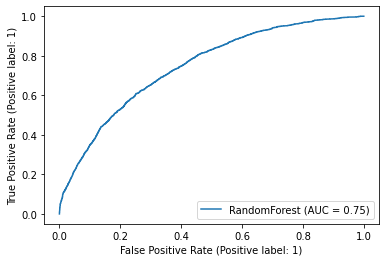

In [105]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier_random,X_test,Y_test,name='RandomForest')